<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/wheat_production_thousand_tonnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analysing the wheat production***

---

In [26]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Importing 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

## Reading CSV

---

In [28]:

file_path ='/content/drive/MyDrive/Data_Lake/wheat_production/'
file = 'paises_produtores.csv'

Reading encoding

In [29]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

Reading CSV

In [30]:
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as countries:
  df_countries = pd.read_csv(countries)


# Dataframe

**A Alemanha e a França não constam na base original dos países com produção de Trigo**

---

In [31]:
df_countries

,Country,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
0,Commodity,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat
1,Attribute,Production,Production,Production,Production,Production,Production,Production,Production,Production,Production,Production,Production
2,Frequency,A,A,A,A,A,A,A,A,A,A,A,A
3,1960-01-01,7450.0,350.0,14108.0,20960.0,1499.0,10320.0,0.0,0.0,NaN,7000.0,NaN,36877.0
4,1961-01-01,6727.0,250.0,7713.0,14250.0,1436.0,10995.0,0.0,0.0,NaN,6336.0,NaN,33557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2017-01-01,20941.0,4264.0,30377.0,134334.0,8450.0,98510.0,0.0,0.0,85167.0,21000.0,14444.0,47380.0
61,2018-01-01,17598.0,5428.0,32352.0,131430.0,8450.0,99870.0,0.0,0.0,71685.0,19000.0,13455.0,51306.0
62,2019-01-01,15200.0,5200.0,32670.0,133590.0,8770.0,103600.0,0.0,0.0,73610.0,17500.0,15600.0,52581.0
63,2020-01-01,33000.0,6250.0,35183.0,134250.0,8900.0,107860.0,0.0,0.0,85354.0,18250.0,9658.0,49691.0


## Renomeando as Colunas e dropando níveis desnecessários

---

In [32]:
def replace (col): 
    return col.replace("-01-01",'')

In [33]:
df_countries.shape

(65, 13)

In [34]:
anos = {"Country":"Years"}
df_countries=\
(
    df_countries.drop(range(0,3))
    .rename(columns=anos)
    .set_index("Years")
    .rename(index=replace)
 )


In [35]:
df_countries.shape

(62, 12)

In [36]:
df_countries

,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
Years,,,,,,,,,,,,
1960,7450.0,350.0,14108.0,20960.0,1499.0,10320.0,0.0,0.0,NaN,7000.0,NaN,36877.0
1961,6727.0,250.0,7713.0,14250.0,1436.0,10995.0,0.0,0.0,NaN,6336.0,NaN,33557.0
1962,8353.0,256.0,15392.0,16665.0,1593.0,12076.0,0.0,0.0,NaN,6804.0,NaN,29719.0
1963,8925.0,100.0,19690.0,18475.0,1493.0,10779.0,0.0,0.0,NaN,7892.0,NaN,31216.0
1964,10037.0,226.0,16349.0,20840.0,1500.0,9854.0,0.0,0.0,NaN,7000.0,NaN,34917.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,20941.0,4264.0,30377.0,134334.0,8450.0,98510.0,0.0,0.0,85167.0,21000.0,14444.0,47380.0
2018,17598.0,5428.0,32352.0,131430.0,8450.0,99870.0,0.0,0.0,71685.0,19000.0,13455.0,51306.0
2019,15200.0,5200.0,32670.0,133590.0,8770.0,103600.0,0.0,0.0,73610.0,17500.0,15600.0,52581.0


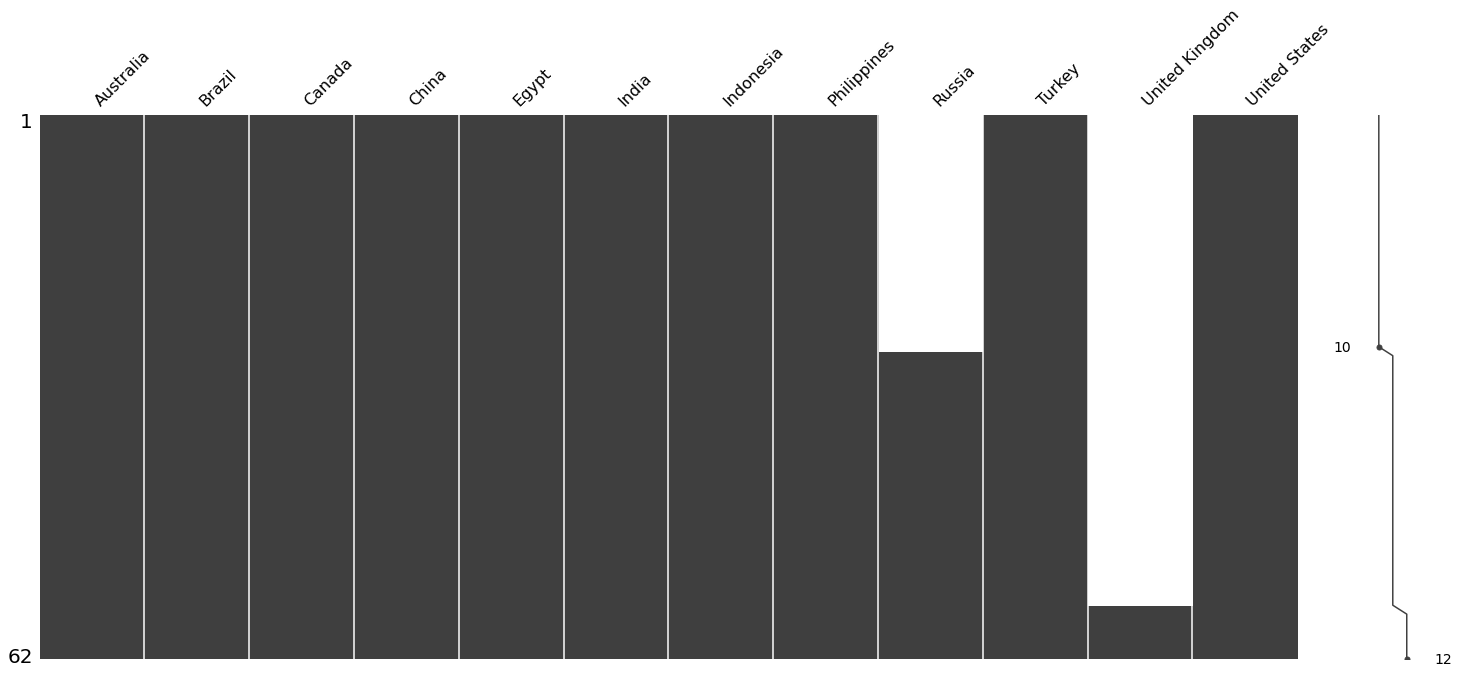

In [37]:
msno.matrix(df_countries)

In [38]:
df_countries.isna().sum()

Australia          0
Brazil             0
Canada             0
China              0
Egypt              0
India              0
Indonesia          0
Philippines        0
Russia            27
Turkey             0
United Kingdom    56
United States      0
dtype: int64

In [39]:
#fillna and changing types
df_countries =\
(
    df_countries.fillna(0)
    .astype(float)
    .astype(int)
   
)



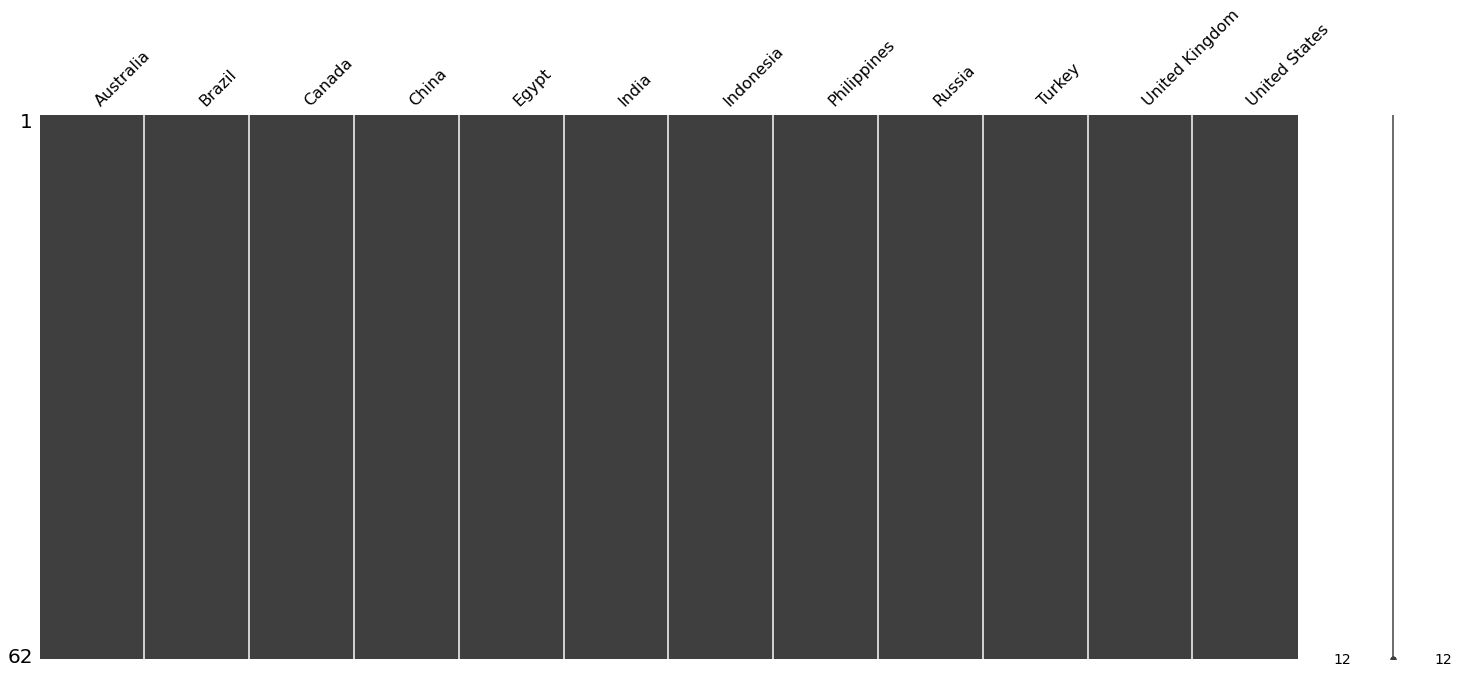

In [40]:
msno.matrix(df_countries)

In [41]:
#replacing name for ISO3 cod
iso3 = {'Australia' :"AUS", 'Brazil':"BRA", 'Canada':"CAN", 'China':"CHN", 'Egypt':"EGY", 'India':"IND", 'Indonesia':"IDN",
       'Philippines':"PHL", 'Russia':"RUS", 'Turkey':"TUR", 'United Kingdom':"GBR", 'United States':"USA"}

df_countries_iso3=df_countries.rename(columns=iso3)
df_countries_iso3.head()

,AUS,BRA,CAN,CHN,EGY,IND,IDN,PHL,RUS,TUR,GBR,USA
Years,,,,,,,,,,,,
1960,7450,350,14108,20960,1499,10320,0,0,0,7000,0,36877
1961,6727,250,7713,14250,1436,10995,0,0,0,6336,0,33557
1962,8353,256,15392,16665,1593,12076,0,0,0,6804,0,29719
1963,8925,100,19690,18475,1493,10779,0,0,0,7892,0,31216
1964,10037,226,16349,20840,1500,9854,0,0,0,7000,0,34917


In [105]:
#checking the usage
df_countries_iso3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AUS     62 non-null     int64
 1   BRA     62 non-null     int64
 2   CAN     62 non-null     int64
 3   CHN     62 non-null     int64
 4   EGY     62 non-null     int64
 5   IND     62 non-null     int64
 6   IDN     62 non-null     int64
 7   PHL     62 non-null     int64
 8   RUS     62 non-null     int64
 9   TUR     62 non-null     int64
 10  GBR     62 non-null     int64
 11  USA     62 non-null     int64
dtypes: int64(12)
memory usage: 8.8+ KB


*DADOS ESTATÍSTICOS*

---

In [106]:
estatistica = \
(
    df_countries_iso3.describe(include=[np.number])
    .T
    .astype(int)
    .sort_values('max',ascending=False)

)
estatistica

,count,mean,std,min,25%,50%,75%,max
CHN,62,81563,38683,14250,42133,90548,112341,136000
IND,62,53294,29405,9854,27019,54622,75046,108000
RUS,62,28359,27883,0,0,33085,47456,85354
USA,62,54305,11406,29719,47615,55969,62351,75805
CAN,62,23379,6491,7713,17833,24266,27241,37589
AUS,62,16519,6893,6590,10623,16143,21988,33000
TUR,62,14017,3950,6336,11750,15375,16950,21000
GBR,62,1316,4098,0,0,0,0,15600
EGY,62,4506,2863,1272,1820,4193,7334,9000
BRA,62,3195,2003,100,1894,2798,5275,6800


In [107]:
df_countries_iso3.sort_index(ascending = False)


,AUS,BRA,CAN,CHN,EGY,IND,IDN,PHL,RUS,TUR,GBR,USA
Years,,,,,,,,,,,,
2021,27000,6800,32000,136000,9000,108000,0,0,85000,17250,14100,50948
2020,33000,6250,35183,134250,8900,107860,0,0,85354,18250,9658,49691
2019,15200,5200,32670,133590,8770,103600,0,0,73610,17500,15600,52581
2018,17598,5428,32352,131430,8450,99870,0,0,71685,19000,13455,51306
2017,20941,4264,30377,134334,8450,98510,0,0,85167,21000,14444,47380
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,10037,226,16349,20840,1500,9854,0,0,0,7000,0,34917
1963,8925,100,19690,18475,1493,10779,0,0,0,7892,0,31216
1962,8353,256,15392,16665,1593,12076,0,0,0,6804,0,29719


In [108]:
#Verificando as colunas
col = df_countries.columns
col

Index(['Australia', 'Brazil', 'Canada', 'China', 'Egypt', 'India', 'Indonesia',
       'Philippines', 'Russia', 'Turkey', 'United Kingdom', 'United States'],
      dtype='object')

In [109]:
path_to_charts='/content/drive/MyDrive/Trigo_analises/charts/'

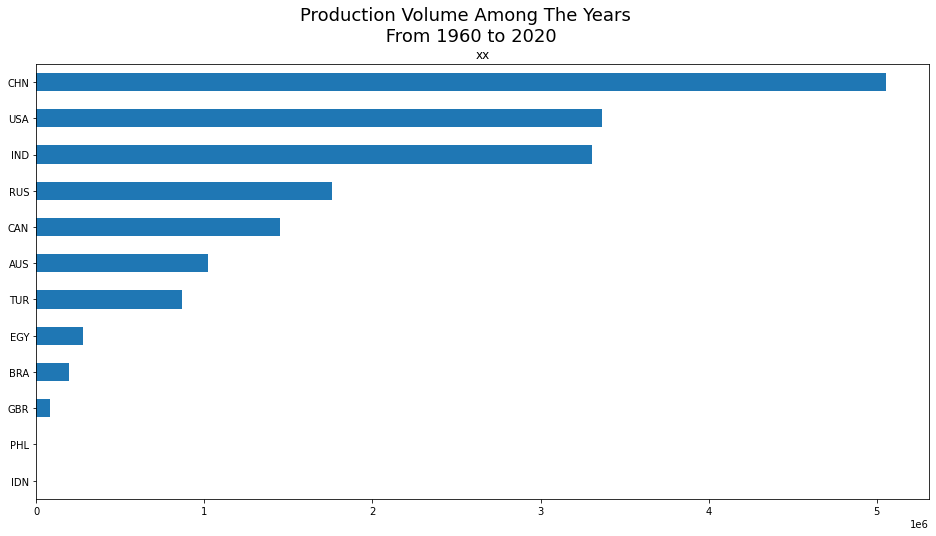

In [110]:
fig, ax_array = plt.subplots(1,1, figsize = (16,8))
ax1= ax_array
fig.suptitle("Production Volume Among The Years \n From 1960 to 2020", size=18)
ex_1 = df_countries_iso3.sum().sort_values(ascending= True)
ex_1.plot.barh(ax=ax1, title= "xx")
fig.savefig(f'{path_to_charts}Production Volume Among The Years From 1960 to 2020.png', dpi=300,)

In [111]:
df_countries_iso3.sum().sort_values(ascending= False)

CHN    5056955
USA    3366934
IND    3304256
RUS    1758282
CAN    1449554
AUS    1024226
TUR     869062
EGY     279413
BRA     198137
GBR      81640
PHL          0
IDN          0
dtype: int64

##***The Top producer of each Year***

---

In [112]:
tops_for_year=\
(
    df_countries_iso3.reset_index()
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Production")
    .sort_values("Production", ascending= False)
    .drop_duplicates(subset="Years")
    .set_index("Years")
)
tops_for_year

,Countries,Production
Years,,
2021,CHN,136000
2017,CHN,134334
2020,CHN,134250
2019,CHN,133590
2016,CHN,133271
...,...,...
1965,USA,34917
1964,USA,34917
1961,USA,33557


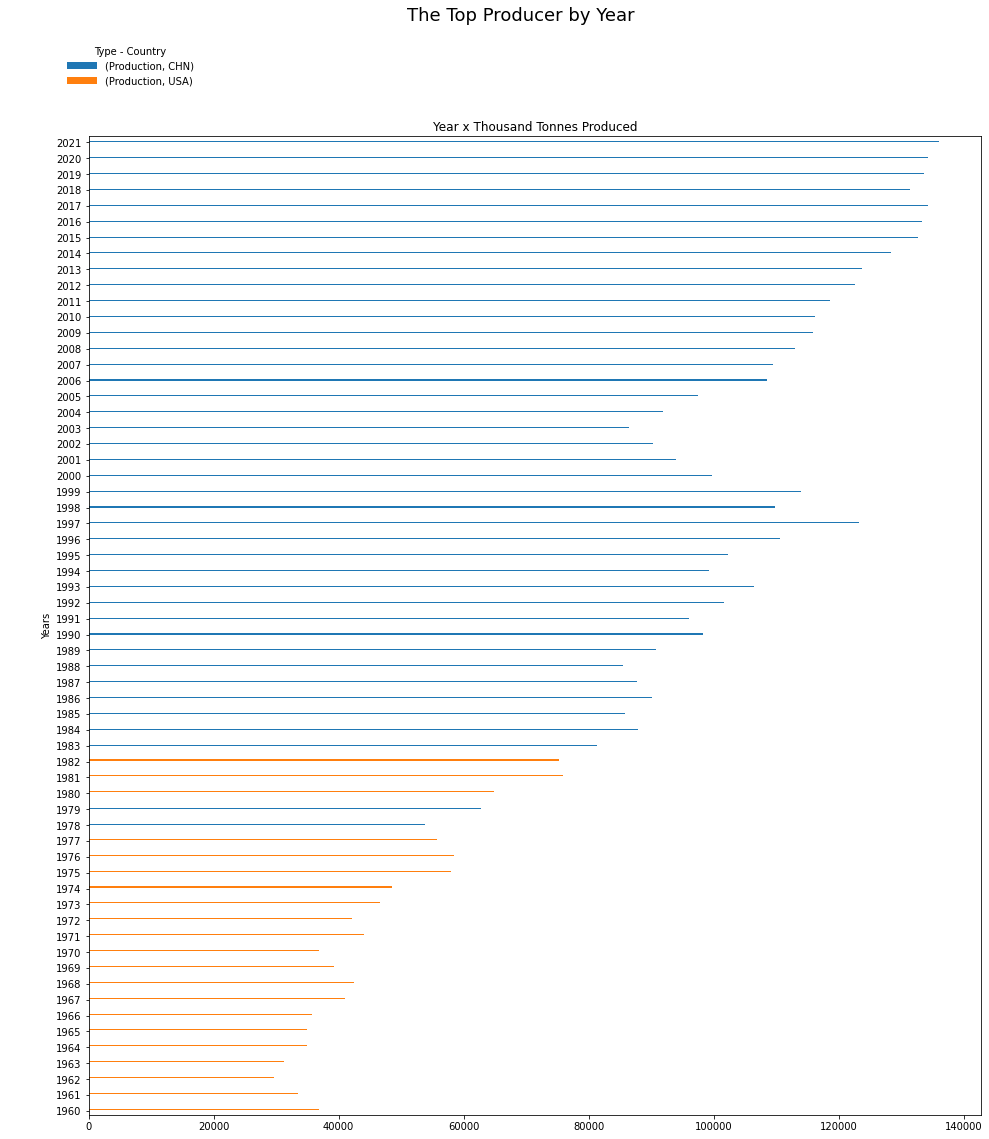

In [120]:
#Plotting the Biggest Producer by Year
fig, ax_array2 = plt.subplots(1,1, figsize = (16,18))
ax2= ax_array2
fig.suptitle("The Top Producer by Year", size=18)
ex_2 = tops_for_year.pivot(columns= 'Countries')
ex_2.plot.barh(ax=ax2, title= "Year x Thousand Tonnes Produced",legend=False,width=0.13, align='edge')
ax2.figure.legend(framealpha=1, frameon=False, title ="Type - Country", handlelength=3.0, handletextpad= 0.8,loc='upper left',bbox_to_anchor=(0.05, 0.85))
fig.savefig(f"{path_to_charts}The Top Producer by Year.png",dpi=300)

In [113]:
counting_zeros= (df_countries_iso3.reset_index().eq(0).sum())
counting_zeros

Years     0
AUS       0
BRA       0
CAN       0
CHN       0
EGY       0
IND       0
IDN      62
PHL      62
RUS      27
TUR       0
GBR      56
USA       0
dtype: int64

In [114]:
counting_no_zeros=df_countries_iso3.reset_index().astype(bool).sum(axis=0)
counting_no_zeros



Years    62
AUS      62
BRA      62
CAN      62
CHN      62
EGY      62
IND      62
IDN       0
PHL       0
RUS      35
TUR      62
GBR       6
USA      62
dtype: int64

In [121]:
lista =[]

for i,v in counting_no_zeros.iteritems():
  if v !=0:
    lista.append(i)


print(lista)


['Years', 'AUS', 'BRA', 'CAN', 'CHN', 'EGY', 'IND', 'RUS', 'TUR', 'GBR', 'USA']


## ***The last-placed producer at each year***

---

In [123]:
last_for_years=\
(
    #dataframe original
    df_countries_iso3.reset_index()
    #filtering years and countries that have no zero in the entire column
    .filter(items=lista)
    #unpivoting
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Production")
    #sorting_values
    .sort_values(["Years","Production"], ascending= [False,True])
  )
    
last_for_years

                




,Years,Countries,Production
123,2021,BRA,6800
309,2021,EGY,9000
557,2021,GBR,14100
495,2021,TUR,17250
61,2021,AUS,27000
...,...,...,...
0,1960,AUS,7450
310,1960,IND,10320
124,1960,CAN,14108
186,1960,CHN,20960


In [124]:
last_for_years=\
(
    last_for_years.loc[last_for_years["Production"]>0,:]
    #drop duplicates
    .drop_duplicates(subset="Years")
    #setting the index
    .set_index("Years")

)

last_for_years

,Countries,Production
Years,,
2021,BRA,6800
2020,BRA,6250
2019,BRA,5200
2018,BRA,5428
2017,BRA,4264
...,...,...
1964,BRA,226
1963,BRA,100
1962,BRA,256


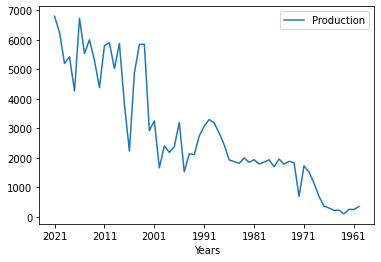

In [135]:
last_for_years.plot()

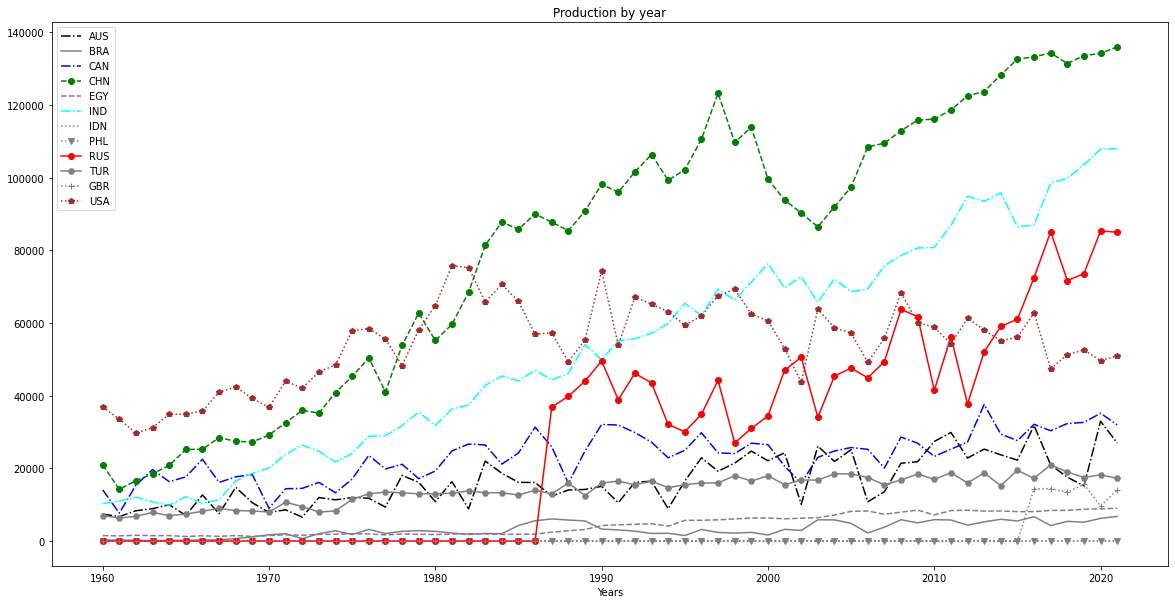

In [130]:
fig,ax = plt.subplots(figsize=(20,10))

df_countries_iso3.plot.line(ax=ax, title="Production by year", style=['-.','-','-.','--o','--','-.',':',':v','-o','-H',':+',':p'], color=['black','gray','blue','green','gray','cyan','gray','gray','red','gray','gray','brown'])

fig.savefig(f"{path_to_charts}Productions by year.png",dpi=300)

SAVING

In [131]:
path_analises_trigo = "/content/drive/MyDrive/Trigo_analises/notebooks/analises/"

In [133]:
tops_for_year.to_csv(f"{path_analises_trigo}tops_year_producer.csv")
last_for_years.to_csv(f"{path_analises_trigo}last_placed_years_producer.csv")

In [134]:
path_to_limpos_trigo ='/content/drive/MyDrive/Trigo_analises/limpos/'
df_countries_iso3.to_csv(f"{path_to_limpos_trigo}paises_selecionados_produtores.csv")